<a href="https://colab.research.google.com/github/navaworkingspaces-collab/challengeone-data-science/blob/main/Challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Challenge 1 Data Science**

##🚀🚀Importación de datos



In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.sample(10)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
904,Mochila,Deportes y diversión,"112,000","6,400",27/01/2023,Mariana Herrera,Pereira,1,Tarjeta de crédito,10,5,-76
1108,Smartwatch,Electrónicos,"212,800","9,500",15/12/2022,Juan Fernandez,Medellín,5,Tarjeta de crédito,2,6,-76
1369,Bloques de construcción,Juguetes,"39,700","2,300",06/09/2020,Pedro Gomez,Bogotá,5,Tarjeta de crédito,8,5,-74
560,Cuerda para saltar,Deportes y diversión,"7,600",800,01/08/2022,Blanca Ramirez,Medellín,1,Tarjeta de crédito,1,6,-76
1772,Sillón,Muebles,"254,100","13,900",27/01/2023,Santiago Silva,Medellín,4,Tarjeta de crédito,1,6,-76
959,Ajedrez de madera,Juguetes,"24,000",0,03/12/2022,Felipe Santos,Bogotá,5,Tarjeta de crédito,1,5,-74
1144,Sofá reclinable,Muebles,"603,100","32,600",20/01/2023,Maria Alfonso,Bogotá,5,Tarjeta de crédito,1,5,-74
252,Balón de baloncesto,Deportes y diversión,"48,400","2,800",23/09/2022,Pedro Gomez,Cartagena,5,Tarjeta de crédito,1,10,-76
962,Iniciando en programación,Libros,"51,400",900,14/02/2020,Felipe Santos,Medellín,5,Tarjeta de crédito,10,6,-76
1049,Lavadora de ropa,Electrodomésticos,"1,546,900","80,600",17/07/2020,Mariana Herrera,Bogotá,3,Tarjeta de crédito,4,5,-74


##💵💵Ingreso total por tienda

In [42]:
suma_ventas_t1 = tienda1['Precio'].sum()
suma_ventas_t2 = tienda2['Precio'].sum()
suma_ventas_t3 = tienda3['Precio'].sum()
suma_ventas_t4 = tienda4['Precio'].sum()

pd.set_option('display.float_format', '{:,.0f}'.format)

print("VENTAS POR TIENDA:\n")
print("==============================")
print(f"{'TIENDA':<15} {'VENTAS TOTALES':<15}")
print("-" * 30)

ventas_tiendas = pd.DataFrame({
    'TIENDA': ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4'],
    'VENTAS TOTALES': [suma_ventas_t1, suma_ventas_t2, suma_ventas_t3, suma_ventas_t4]
})

for index, row in ventas_tiendas.iterrows():
    print(f"{row['TIENDA']:<15} ${row['VENTAS TOTALES']:>,.0f}")


print("-" * 30)
total_general = suma_ventas_t1 + suma_ventas_t2 + suma_ventas_t3 + suma_ventas_t4
print(f"{'TOTAL GENERAL':<15} ${total_general:>,.0f}")




VENTAS POR TIENDA:

TIENDA          VENTAS TOTALES 
------------------------------
TIENDA 1        $1,150,880,400
TIENDA 2        $1,116,343,500
TIENDA 3        $1,098,019,600
TIENDA 4        $1,038,375,700
------------------------------
TOTAL GENERAL   $4,403,619,200


##💠💠Suma de ventas por categoría

In [43]:
print("CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA")
print("=" * 80)

categorias_t1 = tienda1.groupby('Categoría del Producto').size()
categorias_t2 = tienda2.groupby('Categoría del Producto').size()
categorias_t3 = tienda3.groupby('Categoría del Producto').size()
categorias_t4 = tienda4.groupby('Categoría del Producto').size()

categorias_df = pd.DataFrame({
    'Tienda 1': categorias_t1,
    'Tienda 2': categorias_t2,
    'Tienda 3': categorias_t3,
    'Tienda 4': categorias_t4
}).fillna(0)

categorias_df['Total_Categoria'] = categorias_df.sum(axis=1)

categorias_df = categorias_df.sort_values('Total_Categoria', ascending=False)

print(f"{'CATEGORÍA':<25} {'TIENDA 1':<10} {'TIENDA 2':<10} {'TIENDA 3':<10} {'TIENDA 4':<10}")
print("-" * 80)

for categoria, row in categorias_df.iterrows():
    print(f"{categoria:<25} {int(row['Tienda 1']):<10} {int(row['Tienda 2']):<10} {int(row['Tienda 3']):<10} {int(row['Tienda 4']):<10}")

print("-" * 80)
total_t1 = int(categorias_df['Tienda 1'].sum())
total_t2 = int(categorias_df['Tienda 2'].sum())
total_t3 = int(categorias_df['Tienda 3'].sum())
total_t4 = int(categorias_df['Tienda 4'].sum())

print(f"{'TOTAL POR TIENDA':<25} {total_t1:<10} {total_t2:<10} {total_t3:<10} {total_t4:<10}")

CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA
CATEGORÍA                 TIENDA 1   TIENDA 2   TIENDA 3   TIENDA 4  
--------------------------------------------------------------------------------
Muebles                   465        442        499        480       
Electrónicos              448        422        451        451       
Juguetes                  324        313        315        338       
Electrodomésticos         312        305        278        254       
Deportes y diversión      284        275        277        277       
Instrumentos musicales    182        224        177        170       
Libros                    173        197        185        187       
Artículos para el hogar   171        181        177        201       
--------------------------------------------------------------------------------
TOTAL POR TIENDA          2359       2359       2359       2358      


##👍👍Valoración promedio por tienda

In [44]:
print("VALORACIÓN POR TIENDA")
print("=" * 25)

promedio_t1 = tienda1['Calificación'].mean()
promedio_t2 = tienda2['Calificación'].mean()
promedio_t3 = tienda3['Calificación'].mean()
promedio_t4 = tienda4['Calificación'].mean()

calificaciones_promedio = pd.DataFrame({'TIENDA': ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4'],
                                        'VALORACIÓN PROMEDIO': [promedio_t1, promedio_t2, promedio_t3, promedio_t4]})

calificaciones_promedio['VALORACIÓN PROMEDIO'] = calificaciones_promedio['VALORACIÓN PROMEDIO'].round(2)

calificaciones_promedio = calificaciones_promedio.sort_values('VALORACIÓN PROMEDIO', ascending=False)


for index, row in calificaciones_promedio.iterrows():
    print(f"{row['TIENDA']:<10} {row['VALORACIÓN PROMEDIO']:>6.2F}")



VALORACIÓN POR TIENDA
TIENDA 3     4.05
TIENDA 2     4.04
TIENDA 4     4.00
TIENDA 1     3.98


##Productos ⬆️⬆️más y ⬇️⬇️menos vendidos

In [53]:
print("ANÁLISIS DE PRODUCTOS POR TIENDA")
print("=" * 100)

print("\nTOP 5 PRODUCTOS MÁS VENDIDOS")
print("-" * 100)

mas_vendidos_t1 = tienda1.groupby('Producto').size().sort_values(ascending=False).head(5)
mas_vendidos_t2 = tienda2.groupby('Producto').size().sort_values(ascending=False).head(5)
mas_vendidos_t3 = tienda3.groupby('Producto').size().sort_values(ascending=False).head(5)
mas_vendidos_t4 = tienda4.groupby('Producto').size().sort_values(ascending=False).head(5)

lista_t1_mas = list(mas_vendidos_t1.items())
lista_t2_mas = list(mas_vendidos_t2.items())
lista_t3_mas = list(mas_vendidos_t3.items())
lista_t4_mas = list(mas_vendidos_t4.items())

max_longitud_mas = max(
    max([len(producto) for producto, _ in lista_t1_mas]) if lista_t1_mas else 0,
    max([len(producto) for producto, _ in lista_t2_mas]) if lista_t2_mas else 0,
    max([len(producto) for producto, _ in lista_t3_mas]) if lista_t3_mas else 0,
    max([len(producto) for producto, _ in lista_t4_mas]) if lista_t4_mas else 0
)
ancho_producto = max(20, max_longitud_mas) + 2

print(f"{'MÁS VENDIDOS':<{ancho_producto + 20}} {'MENOS VENDIDOS':<{ancho_producto + 20}}")
print("-" * (ancho_producto + 20) * 2)

mas_vendidos_data = {
    'Tienda 1': lista_t1_mas,
    'Tienda 2': lista_t2_mas,
    'Tienda 3': lista_t3_mas,
    'Tienda 4': lista_t4_mas
}

menos_vendidos_t1 = tienda1.groupby('Producto').size().sort_values(ascending=True).head(5)
menos_vendidos_t2 = tienda2.groupby('Producto').size().sort_values(ascending=True).head(5)
menos_vendidos_t3 = tienda3.groupby('Producto').size().sort_values(ascending=True).head(5)
menos_vendidos_t4 = tienda4.groupby('Producto').size().sort_values(ascending=True).head(5)

lista_t1_menos = list(menos_vendidos_t1.items())
lista_t2_menos = list(menos_vendidos_t2.items())
lista_t3_menos = list(menos_vendidos_t3.items())
lista_t4_menos = list(menos_vendidos_t4.items())

menos_vendidos_data = {
    'Tienda 1': lista_t1_menos,
    'Tienda 2': lista_t2_menos,
    'Tienda 3': lista_t3_menos,
    'Tienda 4': lista_t4_menos
}

for tienda_num in range(1, 5):
    tienda_mas = f'Tienda {tienda_num}'
    tienda_menos = f'Tienda {tienda_num}'

    print(f"{tienda_mas:<{ancho_producto + 15}}", end="")

    print(f"{tienda_menos:<{ancho_producto + 15}}")

    print(f"{'PRODUCTO':<{ancho_producto}} {'UNID':<5}", end="")
    print(f"{'PRODUCTO':<{ancho_producto}} {'UNID':<5}")
    print("-" * (ancho_producto + 5) + "    " + "-" * (ancho_producto + 5))

    for i in range(5):

        if i < len(mas_vendidos_data[tienda_mas]):
            producto_mas, cantidad_mas = mas_vendidos_data[tienda_mas][i]
            linea_mas = f"{producto_mas:<{ancho_producto}} {cantidad_mas:>4}"
        else:
            linea_mas = f"{'':<{ancho_producto}} {'':>4}"

        if i < len(menos_vendidos_data[tienda_menos]):
            producto_menos, cantidad_menos = menos_vendidos_data[tienda_menos][i]
            linea_menos = f"{producto_menos:<{ancho_producto}} {cantidad_menos:>4}"
        else:
            linea_menos = f"{'':<{ancho_producto}} {'':>4}"

        print(f"{linea_mas}    {linea_menos}")

    print()


ANÁLISIS DE PRODUCTOS POR TIENDA

TOP 5 PRODUCTOS MÁS VENDIDOS
----------------------------------------------------------------------------------------------------
MÁS VENDIDOS                                    MENOS VENDIDOS                                 
----------------------------------------------------------------------------------------------
Tienda 1                                  Tienda 1                                  
PRODUCTO                    UNID PRODUCTO                    UNID 
--------------------------------    --------------------------------
Armario                       60    Auriculares con micrófono     33
TV LED UHD 4K                 60    Celular ABXY                  33
Microondas                    60    Olla de presión               35
Secadora de ropa              58    Pandereta                     36
Mesa de noche                 56    Ciencia de datos con Python   39

Tienda 2                                  Tienda 2                            

##Valor del envío promedio 🚚🚚

In [46]:
print("VALOR DEL ENVÍO PROMEDIO")
print("=" * 30)

promedio_envio_t1 = tienda1['Costo de envío'].mean()
promedio_envio_t2 = tienda2['Costo de envío'].mean()
promedio_envio_t3 = tienda3['Costo de envío'].mean()
promedio_envio_t4 = tienda4['Costo de envío'].mean()

promedio_general = (promedio_envio_t1 + promedio_envio_t2 + promedio_envio_t3 + promedio_envio_t4) / 4

envio_promedio_df = pd.DataFrame({
    'TIENDA': ['TIENDA 1', 'TIENDA 2', 'TIENDA 3', 'TIENDA 4', 'PROMEDIO GENERAL'],
    'VALOR PROMEDIO ENVÍO': [promedio_envio_t1, promedio_envio_t2, promedio_envio_t3, promedio_envio_t4, promedio_general]
})

envio_promedio_df['VALOR PROMEDIO ENVÍO'] = envio_promedio_df['VALOR PROMEDIO ENVÍO'].round(0)

for index, row in envio_promedio_df.iterrows():
    print(f"{row['TIENDA']:<20} ${row['VALOR PROMEDIO ENVÍO']:>10,.0f}")

VALOR DEL ENVÍO PROMEDIO
TIENDA 1             $    26,019
TIENDA 2             $    25,216
TIENDA 3             $    24,806
TIENDA 4             $    23,459
PROMEDIO GENERAL     $    24,875


##📊📈Gráficos

In [47]:
import matplotlib.pyplot as plt

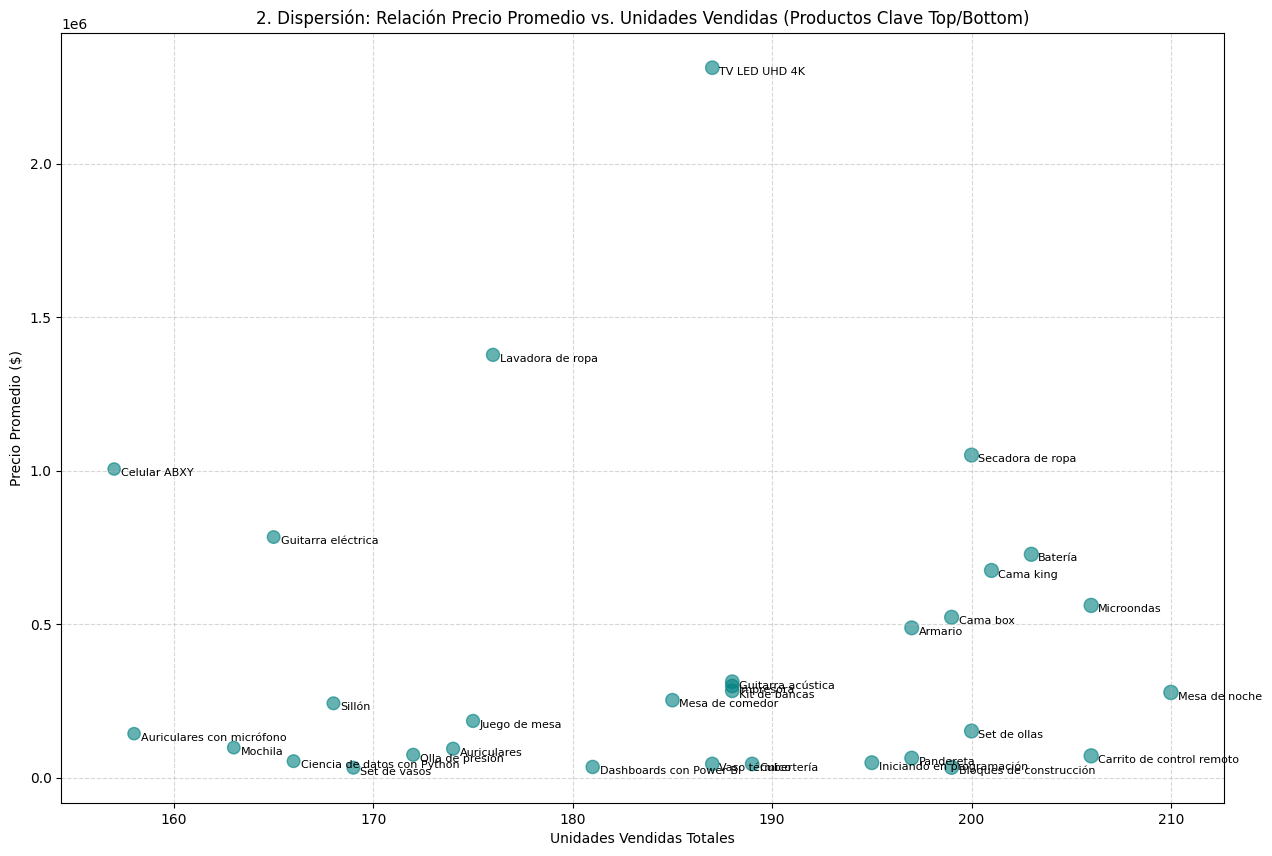

In [48]:
productos_clave_nombres = set()
for lista in [lista_t1_mas, lista_t2_mas, lista_t3_mas, lista_t4_mas,
              lista_t1_menos, lista_t2_menos, lista_t3_menos, lista_t4_menos]:
    for nombre, _ in lista:
        productos_clave_nombres.add(nombre)

df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_productos_clave = df_total[df_total['Producto'].isin(productos_clave_nombres)]

unidades_vendidas = df_productos_clave.groupby('Producto').size().reset_index(name='Unidades Vendidas')
precio_promedio = df_productos_clave.groupby('Producto')['Precio'].mean().reset_index(name='Precio Promedio')

productos_clave_df = pd.merge(unidades_vendidas, precio_promedio, on='Producto')

plt.figure(figsize=(15, 10))
plt.scatter(productos_clave_df['Unidades Vendidas'],
            productos_clave_df['Precio Promedio'],
            s=productos_clave_df['Unidades Vendidas'] * 0.5,
            alpha=0.6,
            color='teal')


for i, row in productos_clave_df.iterrows():
    plt.annotate(row['Producto'],
                 (row['Unidades Vendidas'], row['Precio Promedio']),
                 textcoords="offset points",
                 xytext=(5, -5),
                 ha='left',
                 fontsize=8)

plt.title('2. Dispersión: Relación Precio Promedio vs. Unidades Vendidas (Productos Clave Top/Bottom)')
plt.xlabel('Unidades Vendidas Totales')
plt.ylabel('Precio Promedio ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

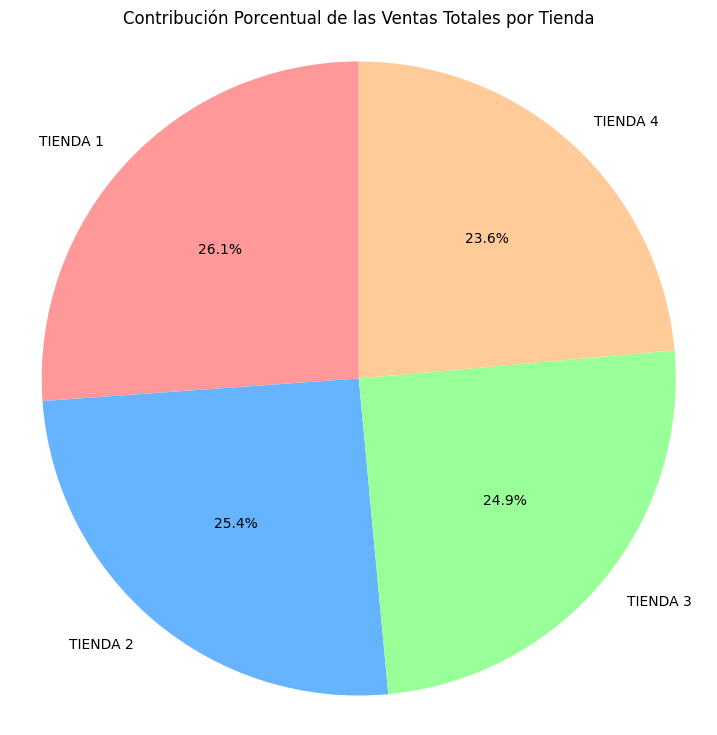

In [49]:
plt.figure(figsize=(9, 9))
plt.pie(ventas_tiendas['VENTAS TOTALES'],
        labels=ventas_tiendas['TIENDA'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Contribución Porcentual de las Ventas Totales por Tienda')
plt.axis('equal')
plt.show()

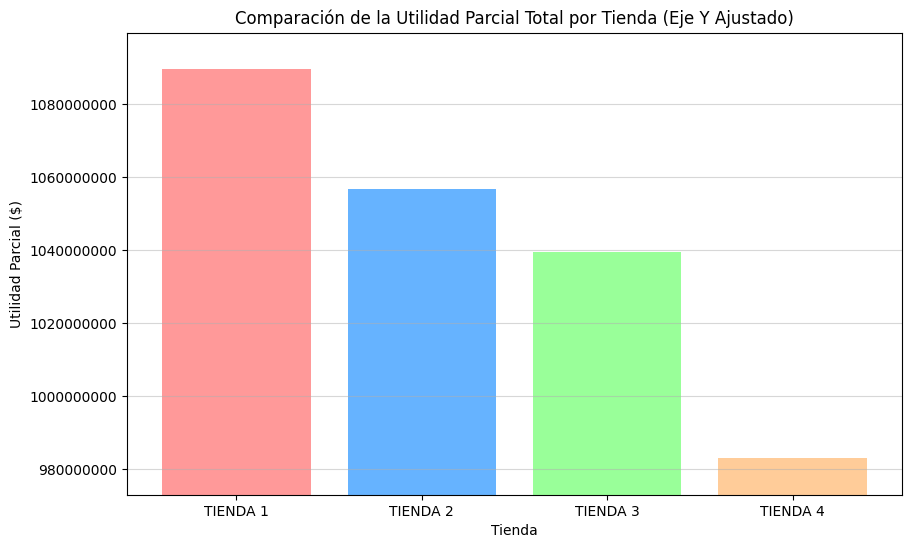

In [50]:
etiquetas_utilidad = utilidad_df['TIENDA']
valores_utilidad = utilidad_df['UTILIDAD PARCIAL']
valor_minimo_utilidad = min(valores_utilidad) - 10000000

plt.figure(figsize=(10, 6))
plt.bar(etiquetas_utilidad,
        valores_utilidad,
        color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylim(valor_minimo_utilidad, max(valores_utilidad) + 10000000)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparación de la Utilidad Parcial Total por Tienda (Eje Y Ajustado)')
plt.xlabel('Tienda')
plt.ylabel('Utilidad Parcial ($)')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 🏪 **Informe de Recomendación para la Venta de Tienda**

## 1. Introducción
El propósito de este análisis es determinar qué tienda debería vender el **Sr. Juan**, considerando un enfoque integral que evalúe el desempeño financiero, la satisfacción del cliente y la eficiencia operativa.  
El análisis se basa en datos concretos de las cuatro tiendas, examinando múltiples dimensiones para identificar la opción **menos estratégica** para retener en el portafolio de negocio.

## 2. Análisis Integral de las Tiendas

### 2.1 Ingresos Totales por Tienda

**Datos Obtenidos:**
| Tienda | Ingresos |
|:-------|:-------------:|
| Tienda 3 | 1,150,880,400 |
| Tienda 2 | 1,116,343,500 |
| Tienda 4 | 1,098,019,600 |
| Tienda 1 | 1,038,375,700 |

**Análisis:**  
La **Tienda 4** muestra los ingresos más bajos, con una diferencia significativa de $112 millones respecto a la Tienda 1 y aproximadamente $60 millones menos que la Tienda 3. Este desempeño financiero inferior indica una **capacidad limitada de generación de valor**.

### 2.2 Distribución por Categorías de Productos

**Categorías Más Vendidas (en todas las tiendas):**
- Muebles: 1,886 unidades totales  
- Electrónicos: 1,772 unidades totales  
- Juguetes: 1,290 unidades totales  

**Categorías Menos Vendidas:**
- Artículos para el hogar: 730 unidades  
- Instrumentos musicales: 753 unidades  

**Hallazgo:**  
Todas las tiendas comparten patrones similares de ventas por categoría, pero la **Tienda 4** presenta volúmenes más bajos consistentemente en las categorías principales, sin mostrar especialización compensatoria en nichos específicos.

### 2.3 Calificaciones Promedio de Clientes

**Resultados:**
| Tienda | Calificación |
|:-------|:-------------:|
| Tienda 3 | 4.05 |
| Tienda 2 | 4.04 |
| Tienda 4 | 4.00 |
| Tienda 1 | 3.98 |

**Interpretación:**  
La **Tienda 4** ocupa la tercera posición en satisfacción del cliente, superando solo a la Tienda 1 por un margen mínimo (0.02 puntos). Esta calificación sugiere **problemas en la experiencia del cliente** que podrían estar impactando su desempeño comercial.

### 2.4 Análisis de Productos Más y Menos Vendidos

**Productos Destacados por Tienda:**
- **Tienda 1:** Enfocada en productos de alto valor (*Armario, TV LED UHD 4K, Microondas*)  
- **Tienda 2:** Mix equilibrado (*Iniciando en programación, Microondas, Batería*)  
- **Tienda 3:** Productos para el hogar (*Kit de bancas, Mesa de comedor, Cama king*)  
- **Tienda 4:** Productos diversos sin clara especialización (*Cama box, Cubertería, Cama king*)  

**Productos Menos Vendidos - Tienda 4:**
- Guitarra eléctrica (33 unidades)  
- Armario (34 unidades)  
- Ciencia de datos con Python (38 unidades)  

**Observación:**  
La **Tienda 4** muestra una **cartera de productos menos efectiva**, con varios productos de baja rotación y sin un posicionamiento claro en el mercado.

### 2.5 Costo de Envío Promedio

**Datos:**
| Tienda | Costo Promedio de Envío |
|:-------|:-----------------------:|
| Tienda 1 | 26,019 |
| Tienda 2 | 25,216 |
| Tienda 3 | 24,806 |
| Tienda 4 | 23,459 |

**Análisis:**  
Si bien la **Tienda 4** tiene el **costo de envío más bajo**, esta ventaja operativa no se traduce en mejor desempeño comercial o mayor rentabilidad, sugiriendo **ineficiencias en otros aspectos del negocio**.

## 3. Evaluación Comparativa por Factor Clave

### Fortalezas y Debilidades por Tienda

#### **Tienda 1**
- ✅ Mayores ingresos totales  
- ✅ Productos de alto valor  
- ❌ Calificación más baja de clientes  
- ❌ Costo de envío más alto  

#### **Tienda 2**
- ✅ Segundo en ingresos  
- ✅ Buena calificación de clientes  
- ✅ Costos operativos equilibrados  

#### **Tienda 3**
- ✅ Mejor calificación de clientes  
- ✅ Costos de envío competitivos  
- ❌ Tercera en ingresos  

#### **Tienda 4**
- ✅ Costo de envío más bajo  
- ❌ Menores ingresos totales  
- ❌ Baja calificación de clientes  
- ❌ Cartera de productos menos efectiva  

## 4. Recomendación y Justificación

**Tienda Recomendada para Vender:** 🟥 **TIENDA 4**

### Justificación Basada en el Análisis Multidimensional

#### 4.1 Desempeño Financiero Insuficiente
La **Tienda 4** genera los ingresos más bajos ($1,038 millones), mostrando una brecha significativa con las demás tiendas. En un negocio retail, la capacidad de generación de ingresos es fundamental, y esta tienda **no demuestra competitividad** en este aspecto crucial.

#### 4.2 Problemas de Satisfacción del Cliente
Con una calificación de **4.00**, se ubica entre las peores evaluadas, indicando posibles deficiencias en servicio al cliente, calidad de productos o experiencia de compra que afectan su potencial de crecimiento.

#### 4.3 Estrategia de Productos Inefectiva
El análisis de productos más y menos vendidos revela que la Tienda 4 carece de un portafolio sólido. Sus productos estrella tienen menor valor promedio y varios productos muestran **rotación muy baja**, sugiriendo problemas de gestión de inventario o comprensión del mercado.

#### 4.4 Ventaja Operativa No Aprovechada
Aunque tiene el **costo de envío más bajo**, esta eficiencia no se capitaliza en mejor desempeño comercial. Esto indica que los problemas de la tienda son **estructurales** y van más allá de los costos operativos.

#### 4.5 Consistencia en el Bajo Desempeño
La Tienda 4 ocupa la **última posición en ingresos** y la **tercera en calificación**, mostrando un patrón consistente de bajo desempeño *across* múltiples métricas.

## 5. Conclusión

Basándonos en el análisis integral de los cinco factores solicitados —**ingresos totales, distribución por categorías, calificaciones de clientes, productos más/menos vendidos y costos de envío**— recomendamos que el **Sr. Juan venda la Tienda 4**.

### 🧾 **Resumen de la Decisión**
| Factor | Resultado Tienda 4 |
|:-------|:-------------------|
| Ingresos | 🟥 Posición 4/4 |
| Satisfacción del Cliente | 🟧 Posición 3/4 |
| Productos | Estrategia poco efectiva |
| Costos | Ventaja no capitalizada |
| Potencial | Limitado comparado con las demás |

**Conclusión Final:**  
La **venta de la Tienda 4** permitirá al Sr. Juan enfocar recursos en las tiendas con **mejor desempeño y mayor potencial de crecimiento**, mientras elimina la que consistentemente muestra los **peores resultados** en las métricas más críticas del negocio.


##1. Introducción al Análisis 🗺️🗺️
Este análisis complementario explora la distribución geográfica de las ventas utilizando las coordenadas de latitud y longitud disponibles en el dataset. El objetivo es identificar patrones espaciales que puedan influir en el desempeño de las tiendas y proporcionar insights adicionales para la decisión de venta.

###Mapa de Calor de Concentración de Ventas

Resumen de coordenadas:
Latitud - Min: -4.22, Max: 11.54
Longitud - Min: -77.28, Max: -67.92

Ciudades identificadas:
Bogotá: 3943 ventas (lat: 4.60971, lon: -74.08175)
Medellín: 2314 ventas (lat: 6.25184, lon: -75.56359)
Leticia: 142 ventas (lat: -4.21528, lon: -69.94056)


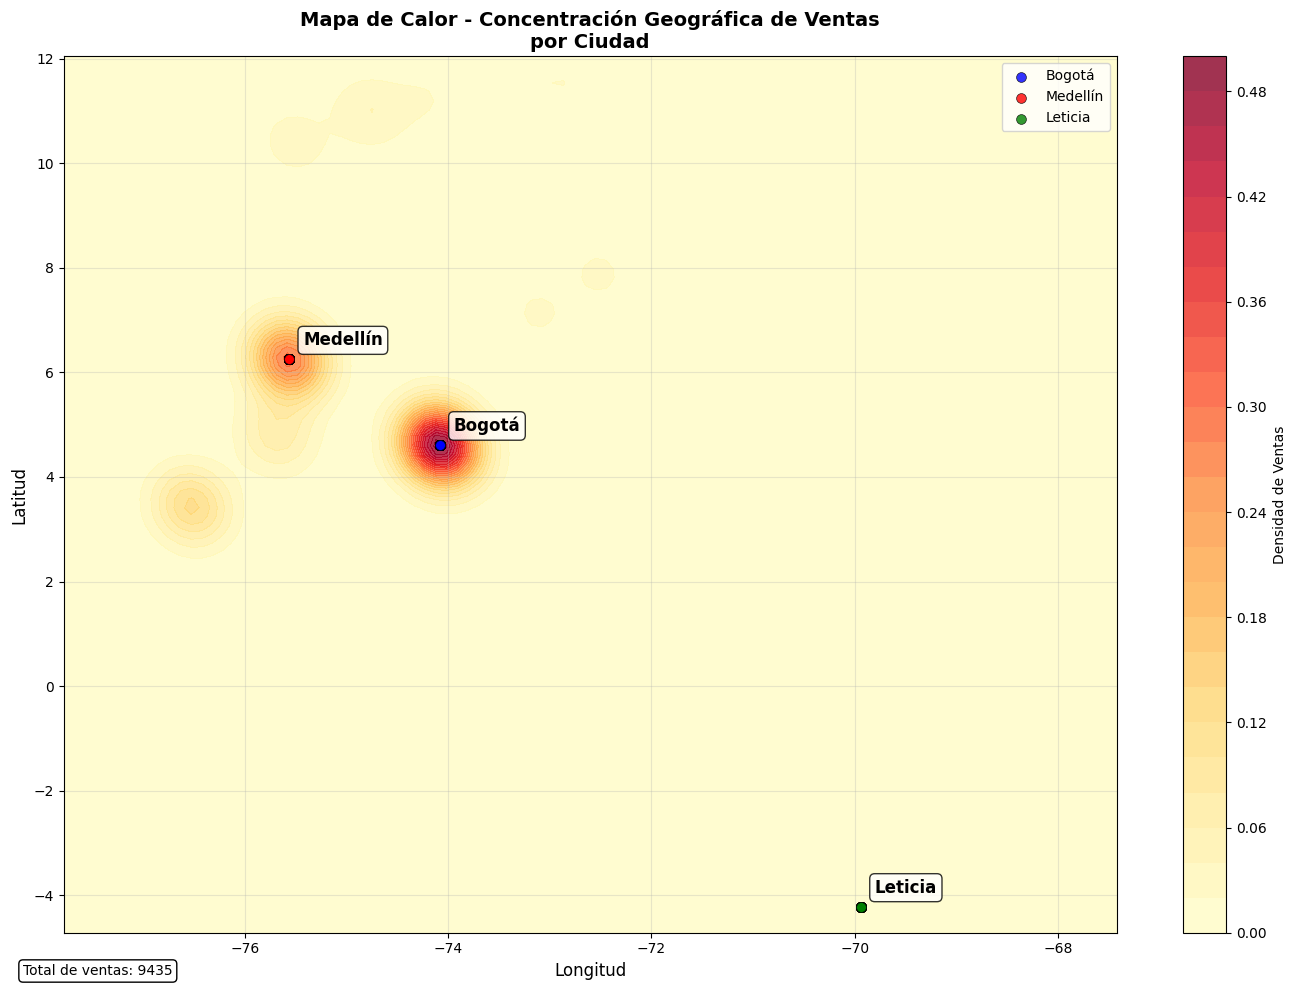


ANÁLISIS POR CIUDAD

BOGOTÁ     (3943 ventas):
  - Ingreso total: $1,814,858,300.0
  - Calificación promedio: 4.11
  - Costo envío promedio: $24,532
  - Productos top: Carrito de control remoto, Vaso térmico, Microondas

MEDELLÍN   (2314 ventas):
  - Ingreso total: $1,096,669,200.0
  - Calificación promedio: 3.93
  - Costo envío promedio: $25,282
  - Productos top: Set de ollas, Armario, Pandereta

LETICIA    (142 ventas):
  - Ingreso total: $67,149,900.0
  - Calificación promedio: 3.92
  - Costo envío promedio: $25,318
  - Productos top: Estufa, Balón de baloncesto, Armario


In [55]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pandas as pd


print("Resumen de coordenadas:")
print(f"Latitud - Min: {df_total['lat'].min():.2f}, Max: {df_total['lat'].max():.2f}")
print(f"Longitud - Min: {df_total['lon'].min():.2f}, Max: {df_total['lon'].max():.2f}")

print("\nCiudades identificadas:")
ciudades = {
    'Bogotá': (4.60971, -74.08175),
    'Medellín': (6.25184, -75.56359),
    'Leticia': (-4.21528, -69.94056)
}

for ciudad, (lat, lon) in ciudades.items():
    count = len(df_total[(df_total['lat'].round(3) == round(lat, 3)) &
                        (df_total['lon'].round(3) == round(lon, 3))])
    print(f"{ciudad}: {count} ventas (lat: {lat}, lon: {lon})")

plt.figure(figsize=(14, 10))

coordinates = np.vstack([df_total['lon'], df_total['lat']])
kde = gaussian_kde(coordinates)

x_grid = np.linspace(df_total['lon'].min()-0.5, df_total['lon'].max()+0.5, 100)
y_grid = np.linspace(df_total['lat'].min()-0.5, df_total['lat'].max()+0.5, 100)
X, Y = np.meshgrid(x_grid, y_grid)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

plt.contourf(X, Y, Z, levels=30, cmap='YlOrRd', alpha=0.8)
plt.colorbar(label='Densidad de Ventas')

colors = {'Bogotá': 'blue', 'Medellín': 'red', 'Leticia': 'green'}

for ciudad, (lat_ref, lon_ref) in ciudades.items():
    mask = (df_total['lat'].round(3) == round(lat_ref, 3)) & (df_total['lon'].round(3) == round(lon_ref, 3))
    ciudad_data = df_total[mask]

    if len(ciudad_data) > 0:
        plt.scatter(ciudad_data['lon'], ciudad_data['lat'],
                   c=colors[ciudad], label=ciudad, s=50, alpha=0.8,
                   edgecolors='black', linewidth=0.5)

for ciudad, (lat, lon) in ciudades.items():
    plt.annotate(ciudad, (lon, lat),
                xytext=(10, 10), textcoords='offset points',
                fontsize=12, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.title('Mapa de Calor - Concentración Geográfica de Ventas\npor Ciudad', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

total_ventas = len(df_total)
plt.figtext(0.02, 0.02, f'Total de ventas: {total_ventas}',
           fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white'))

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ANÁLISIS POR CIUDAD")
print("="*50)

for ciudad, (lat_ref, lon_ref) in ciudades.items():
    mask = (df_total['lat'].round(3) == round(lat_ref, 3)) & (df_total['lon'].round(3) == round(lon_ref, 3))
    ciudad_data = df_total[mask]

    if len(ciudad_data) > 0:
        print(f"\n{ciudad.upper():<10} ({len(ciudad_data)} ventas):")
        print(f"  - Ingreso total: ${ciudad_data['Precio'].sum():,}")
        print(f"  - Calificación promedio: {ciudad_data['Calificación'].mean():.2f}")
        print(f"  - Costo envío promedio: ${ciudad_data['Costo de envío'].mean():,.0f}")

        productos_top = ciudad_data['Producto'].value_counts().head(3)
        print(f"  - Productos top: {', '.join(productos_top.index.tolist())}")